<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/In_class_exercise/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The sixth in-class-exercise (20 points in total, 3/2/2021)**

## **1. Rule-based information extraction (10 points)**

Use any keywords related to data science, natural language processing, machine learning to search from google scholar, get the **titles** of 100 articles (either by web scraping or manually) about this topic, define a set of patterns to extract the research questions/problems, methods/algorithms/models, datasets, applications, or any other important information about this topic. 

In [6]:
# Write your code here
!pip install scholarly

     |████████████████████████████████| 2.9MB 13.7MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 911kB 38.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 2.8MB 33.4MB/s 
     |████████████████████████████████| 3.2MB 49.6MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for stem: filename=stem-1.8.0-cp37-none-any.whl size=436039 sha256=827173971db15aa34cd8a448fc74c60ef711146f9effa815ff231b45d2d482ec
  Stored in directory: /root/.cache/pip/wheels/02/3a/ee/1094b166e029353f892c0b121aa02f48aff5e658396924bc2a
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=f5c8734ce48030f101ea4df723cabea10ee0786413d57a153100162f86be39cd
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for bibtexparser: filename=bibtexparser-1.2.0-cp37-none-any.whl size

In [14]:
from scholarly import scholarly
import csv

In [12]:
search_query = scholarly.search_pubs('Natural Language Processing herbarium')

# Writing to file because Google is sometimes blocking queries
file_object = open('google_scholar_results.jsonl', 'w')

for i in range(100):
    #file_object.write(str(i))
    file_object.write(str(next(search_query)))
    file_object.write('\n')
file_object.close()


In [27]:
import json

with open('google_scholar_results.jsonl', 'r') as result_data:
  #reader = csv.DictReader(result_data)
  data = result_data.readlines()
  for row in data:
    #print(row)
    json_data = json.loads(row.replace("\'", "\""))
    print(json_data)

#print(data)

{'title': 'Towards a scientific workflow featuring Natural Language Processing for the digitisation of natural history collections', 'author': ['D Owen', 'L Livermore', 'Q Groom', 'A Hardisty'], 'pub_year': '2020', 'venue': 'Research Ideas and …', 'abstract': 'Optical Character Recognition (OCR) and Natural Language Processing (NLP) are two technologies that may support the  conversion of that text to a format that may be processed by machine  Herbarium specimens are among the most difficult targets and we know from recent'}
{'title': 'Going deeper in the automated identification of Herbarium specimens', 'author': ['J Carranza-Rojas', 'H Goeau'], 'pub_year': '2017', 'venue': 'BMC …', 'abstract': 'The estimated number of specimens in Natural History collection is in the 2–3 billion range [2  present in this type of image is very high for fully automated computer vision processing  initiatives such as iDigBio already provide access to more than 14 million herbarium images [9'}
{'title': 

JSONDecodeError: ignored

In [32]:
import json
import string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
#nltk('punkt.download')
nltk.download('stopwords')

author_count = {}
titles = []
abstracts = []
#titles_abstracts = []
with open('google_scholar_results.jsonl', 'r') as result_data:
    data_string = result_data.readlines()
    for row in data_string:
        #json_data = json.loads(row.replace("\'", "\""))
        data = json.loads(str(row))
        title = data['title']
        titles.append(title)
        abstract = data['abstract']
        abstracts.append(abstract)
        for author in data['author']:
            #print(author)
            a_count = author_count.get(author, 0)
            a_count += 1
            author_count[author] = a_count

print(author_count)
#print(titles)
titles_string = ' '.join(titles)
#print(titles_string)

# Tokenize titles
titles_tokenized = []
for title in titles:
    toked = word_tokenize(title)
    titles_tokenized.append(toked)
#print(titles_tokenized)

#Lower casing
lowered = []
for sent in titles_tokenized:
    words = [word.lower() for word in sent]
    lowered.append(words)
#print('Lowercase:', lowered)

#Punctuation removal
# make translation for punctuation
remove_punctuation = str.maketrans(string.punctuation, ' '*len(string.punctuation))
#text = text.translate(remove_punctuation)
no_punc = []
for sent in lowered:
    no_punc_sent = []
    for word in sent:
        no_punc_sent.append(word.translate(remove_punctuation))
    no_punc.append(no_punc_sent)
#print('No punctuation:', no_punc)

#Stopwords removal
# Load NLTK stopwords
stop = stopwords.words('english')
no_stops = []
for sent in no_punc:
    no_stop_sent = []
    for word in sent:
        if word not in stop:
            # remove blanks and whitespace
            if len(word.strip())>0:
                no_stop_sent.append(word)
    no_stops.append(no_stop_sent)
#print('Stopwords removed:', no_stops)

#Stemming
st = PorterStemmer()
titles_stemmed = []
for sent in no_stops:
  new_sent = []
  for word in sent:
    new_sent.append(st.stem(word))
  titles_stemmed.append(new_sent)
#print('Stemmed:', titles_stemmed)

"""
#1.2 - Lemmatization
from textblob import Word

titles_lemmed = []
for sent in no_stops:
  new_sent = []
  for word in sent:
    new_sent.append(st.stem(Word(word).lemmatize()))
  titles_lemmed.append(new_sent)
print('Lemmatized:', titles_lemmed)

"""

#tokens = nltk.word_tokenize(titles_string)
all_titles = [item for sublist in titles_stemmed for item in sublist]

fdist=FreqDist(all_titles)
word_frequency = []
for key in fdist:
    #print(key, fdist[key])
    word_frequency.append((key, fdist[key]))

top_words = word_frequency[:10]
print(top_words)

{'D Owen': 1, 'L Livermore': 1, 'Q Groom': 2, 'A Hardisty': 1, 'J Carranza-Rojas': 1, 'H Goeau': 1, 'AP Seregin': 3, 'A Barber': 1, 'D Lafferty': 1, 'LR Landrum': 1, 'M Dillen': 1, 'S Chagnoux': 1, 'A Güntsch': 1, 'R Tegelberg': 1, 'T Mononen': 1, 'H Saarenmaa': 1, 'S Younis': 1, 'C Weiland': 1, 'R Hoehndorf': 1, 'S Dressler': 1, 'JM Edmonds': 1, 'WN Weaver': 1, 'J Ng': 1, 'RG Laport': 1, 'RWG Dennis': 1, 'BM Thiers': 1, 'MC Tulig': 1, 'KA Watson': 1, 'PK Holmgren': 1, 'W Keuken': 1, 'DA Metsger': 1, 'SC Byers': 1, 'DJ Cantrill': 1, 'VC Bieker': 1, 'MD Martin': 1, 'E Nic Lughadha': 1, 'BE Walker': 1, 'JM Heberling': 1, 'LA Prather': 1, 'SJ Tonsor': 1, 'G Le Bras': 1, 'M Pignal': 2, 'ML Jeanson': 1, 'S Muller': 1, 'C Aupic': 1, 'MV Kozlov': 1, 'IV Sokolova': 1, 'V Zverev': 1, 'AA Egorov': 1, 'L Fish': 1, 'E Anderson': 1, 'WB Turrill': 1, 'Í Granzow-de la Cerda': 1, 'JH Beach': 2, 'CX Zeng': 2, 'PM Hollingsworth': 1, 'J Yang': 1, 'DA Ledesma': 1, 'CA Powell': 1, 'J Shaw': 1, 'M Nemati Py

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


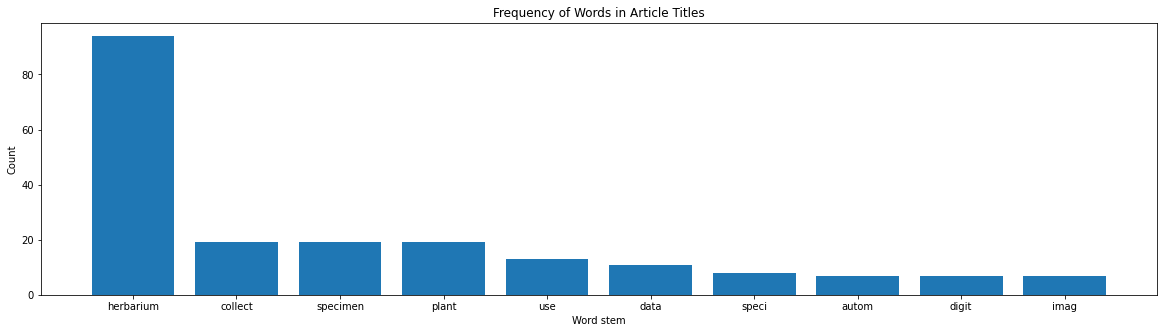

In [36]:
# plot data
import matplotlib.pylab as plt

graph_data = top_words
#graph_data = sorted(graph_data) 
x, y = zip(*graph_data) 
plt.figure(figsize=(20,5))
plt.xlabel("Word stem")
plt.ylabel("Count")
plt.title("Frequency of Words in Article Titles")
plt.bar(x, y)
plt.show()

## **2. Domain-specific information extraction (10 points)**

For the legal case used in the data cleaning exercise: [01-05-1 Adams v Tanner.txt](https://raw.githubusercontent.com/unt-iialab/info5731_spring2021/main/class_exercises/01-05-1%20%20Adams%20v%20Tanner.txt), use [legalNLP](https://lexpredict-lexnlp.readthedocs.io/en/latest/modules/extract/extract.html#nlp-based-extraction-methods) to extract the following inforation from the text (if the information is not exist, just print None):

(1) acts, e.g., “section 1 of the Advancing Hope Act, 1986”

(2) amounts, e.g., “ten pounds” or “5.8 megawatts”

(3) citations, e.g., “10 U.S. 100” or “1998 S. Ct. 1”

(4) companies, e.g., “Lexpredict LLC”

(5) conditions, e.g., “subject to …” or “unless and until …”

(6) constraints, e.g., “no more than”

(7) copyright, e.g., “(C) Copyright 2000 Acme”

(8) courts, e.g., “Supreme Court of New York”

(9) CUSIP, e.g., “392690QT3”

(10) dates, e.g., “June 1, 2017” or “2018-01-01”

(11) definitions, e.g., “Term shall mean …”

(12) distances, e.g., “fifteen miles”

(13) durations, e.g., “ten years” or “thirty days”

(14) geographic and geopolitical entities, e.g., “New York” or “Norway”

(15) money and currency usages, e.g., “$5” or “10 Euro”

(16) percents and rates, e.g., “10%” or “50 bps”

(17) PII, e.g., “212-212-2121” or “999-999-9999”

(18) ratios, e.g.,” 3:1” or “four to three”

(19) regulations, e.g., “32 CFR 170”

(20) trademarks, e.g., “MyApp (TM)”

(21) URLs, e.g., “http://acme.com/”

(22) addresses, e.g., “1999 Mount Read Blvd, Rochester, NY, USA, 14615”

(23) persons, e.g., “John Doe

In [2]:
# Install LEXNLP
!pip install lexnlp


     |████████████████████████████████| 9.8MB 6.5MB/s 
     |████████████████████████████████| 358kB 44.5MB/s 
     |████████████████████████████████| 665kB 41.9MB/s 
     |████████████████████████████████| 6.8MB 40.4MB/s 
     |████████████████████████████████| 296kB 42.4MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 1.4MB 43.6MB/s 
     |████████████████████████████████| 10.1MB 40.8MB/s 
     |████████████████████████████████| 14.5MB 156kB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 25.9MB 1.3MB/s 
     |████████████████████████████████| 10.1MB 45.2MB/s 
     |████████████████████████████████| 245kB 50.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 24.2MB 1.6MB/s 
     |████████████████████████████████| 133kB 56.9MB/s 
  Created wheel for us: filename=us-2.0.2-cp37-none-any.whl size=11929 sha256=5c5dc1eda7ef4a75fcb1147267b7

In [2]:
# Read text data
with open('01-05-1 Adams v Tanner.txt') as f:
    text = f.read()

In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
import lexnlp.extract.en.acts
import lexnlp.extract.en.amounts
import lexnlp.extract.en.citations
import lexnlp.extract.en.entities.nltk_re
import lexnlp.extract.en.conditions
import lexnlp.extract.en.constraints
import lexnlp.extract.en.copyright
import lexnlp.extract.en.courts
import lexnlp.extract.en.cusip
import lexnlp.extract.en.dates
import lexnlp.extract.en.definitions
import lexnlp.extract.en.distances
import lexnlp.extract.en.durations
import lexnlp.extract.en.money
import lexnlp.extract.en.percents
import lexnlp.extract.en.pii
import lexnlp.extract.en.ratios
import lexnlp.extract.en.regulations
import lexnlp.extract.en.trademarks
import lexnlp.extract.en.urls

print(lexnlp.extract.en.acts.get_act_list(text))
print(list(lexnlp.extract.en.citations.get_citations(text)))
print(list(lexnlp.extract.en.entities.nltk_re.get_companies(text)))
print(list(lexnlp.extract.en.conditions.get_conditions(text)))
print(list(lexnlp.extract.en.constraints.get_constraints(text)))
print(list(lexnlp.extract.en.copyright.get_copyright(text)))
print(list(lexnlp.extract.en.cusip.get_cusip(text)))
print(list(lexnlp.extract.en.dates.get_dates(text)))
print(list(lexnlp.extract.en.definitions.get_definitions(text)))
print(list(lexnlp.extract.en.distances.get_distances(text)))
print(list(lexnlp.extract.en.durations.get_durations(text)))
print(list(lexnlp.extract.en.money.get_money(text)))
print(list(lexnlp.extract.en.percents.get_percents(text)))
print(list(lexnlp.extract.en.pii.get_pii(text)))
print(list(lexnlp.extract.en.ratios.get_ratios(text)))
print(list(lexnlp.extract.en.regulations.get_regulations(text)))
print(list(lexnlp.extract.en.trademarks.get_trademarks(text)))
print(list(lexnlp.extract.en.urls.get_urls(text)))


[]
[(5, 'Ala.', 'Alabama Reports', 740, None, None, None), (5, 'Ala.', 'Alabama Reports', 740, '1843', None, None), (55, 'Ala.', 'Alabama Reports', 266, '271', None, None), (47, 'Ala.', 'Alabama Reports', 362, '376', None, None), (45, 'Ala.', 'Alabama Reports', 329, '334', None, None), (31, 'Ala.', 'Alabama Reports', 526, '527', None, None), (21, 'Ala.', 'Alabama Reports', 333, '335', None, None), (8, 'Cal.', 'California Reports', 145, '147', None, None), (65, 'Ala.', 'Alabama Reports', 256, '258', None, None), (4, 'S.W.', 'South Western Reporter', 913, '914', None, None), (103, 'A.L.R.', 'American Law Reports', 464, None, None, None), (9, 'Cow.', "Cowen's Reports", 39, None, None, None), (5, 'Port.', 'Alabama Reports, Porter', 182, None, None, None), (9, 'Johns.', "Johnson's Reports", 108, None, None, None)]
[Lehman, Durr Co, (17983, 18001)]
[('until', '[2]\nCreditors’ Remedies\nLien and Priority\nUnder St.1821, prohibiting a levy on a crop', ''), ('until', 'on a growing crop, nor doe

In [38]:
# LEXNLP NLP methods
import lexnlp.nlp.en.tokens
import lexnlp.extract.en.addresses.addresses

#lexnlp.nlp.en.tokens.get
# Note - LexNLP methods for person name extraction not implmented or not documented
# Substituting noun extraction
print(list(lexnlp.nlp.en.tokens.get_nouns(text)))
print(list(lexnlp.extract.en.addresses.addresses.get_addresses(text)))

['Ala.', 'Supreme', 'Court', 'Alabama.', 'ADAMS', 'v.', 'TANNER', 'AND', 'HORTON.', 'June', 'Term', 'Synopsis', 'WRIT', 'Error', 'Circuit', 'Court', 'Sumter.', 'West', 'Headnotes', 'Chattel', 'Mortgages', 'Crops', 'A', 'crop', 'existence', 'subject-matter', 'mortgage', 'contract', 'interest', 'possession', 'future', 'time.', 'Cases', 'headnote', 'Creditors', 'Remedies', 'Lien', 'Priority', 'St.1821', 'levy', 'crop', 'lien', 'attaches', 'favor', 'fa.', 'crop', 'attach', 'crop', 'Cases', 'headnote', '*', 'trial', 'right', 'property', 'statute.', 'November', 'execution', 'circuit', 'court', 'Sumter', 'suit', 'plaintiff', 'error', 'sheriff', 'county', 'goods', 'c.', 'Allen', 'Harrison', 'others', 'sum', 'dollars', 'costs.', 'execution', 'thirty', 'bales', 'cotton', 'property', 'Allen', 'Harrison', 'bond', 'right.', 'issue', 'question', 'liability', 'cotton', 'plaintiff', '’', 's', 'execution', 'jury.', 'trial', 'bill', 'exceptions', 'instance', 'plaintiff.', 'plaintiff', 'judgment', 'Octob